### k Means
- K개의 그룹(중심점을 기준)으로 데이터 포인트를 나눔

https://scikit-learn.org/stable/modules/clustering.html

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)

중심 임의 지정 후 반복했을 때 모습. iteration 반복할 때마다 클러스터 중심 위치 바뀜

**작동 단계**
1. K개의 중심점 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 > 군집 형성
3. 각 군집의 데이터 포인트 기반으로 새로운 중심점 계산(데이터 포인트의 평균값으로)
4. 2~3 단계를 중심점의 변화가 거의 없을 때까지 반복 실행

**장단점**
- 장점
    - 간단한 개념과 구현
    - 빠른 계산 속도
    - 일반적인 군집화에서 가장 많이 활용되며 대용량 데이터에도 활용 가능
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐
    - 반복적으로 수행하므로 반복 횟수가 많아지면 수행 시간 느려짐
    - 이상치(outlier) 데이터에 취약
    - 군집이 원형 구조가 아닐 경우 성능 저하 가능성

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,       # 분류할 클러스터 개수를 3개로 지정
    init='k-means++',   # 초기 중심점의 설정 방식. 'random'을 넘겨도 됨.
                        # k-means++은 거리를 기반으로 가장 멀리 떨어진 지점들 선택해
    max_iter=300,
    random_state=0
)

kmeans.fit(iris.data) # 중심점 찾기
distances = kmeans.transform(iris.data) # 중심점과의 거리 계산 및 반환
distances.shape # (150, 3) 이때 3칼럼은 세 중심점과의 각 거리가 됨

(150, 3)

In [ ]:
kmeans.labels_
# 제일 가까운 중심점 저장. 즉, 군집화 결과가 됨
iris_df['cluster'] = kmeans.labels_
iris_df.groupby('species')['cluster'].value_counts()

# 0번 species가 cluster 1로 완벽히 분류됨
# 1, 2번 species는 일부 섞임(특히 2번)

species  cluster
0        1          50
1        0          47
         2           3
2        2          36
         0          14
Name: count, dtype: int64

In [17]:
# 시각화 위해 pca로 주성분 2개 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca1'] = pca_transformed[:, 0]
iris_df['pca2'] = pca_transformed[:, 1]

In [22]:
# cluster의 중심점 좌표 반환. (3, 4) shape. 중심점 세 개에 대해 네 개의 특성별로 위치값 저장됨
print(kmeans.cluster_centers_)
centers = pca.transform(kmeans.cluster_centers_)
# 시각화를 위해 클러스터 좌표도 주특성 2개 변환.
# 아까 4특성 -> 2특성 변환과 같은 방식으로 저장 필요하므로(좌표가 iris.data 위치로 설정된 것이기 때문에) fit_transform이 아닌 transform.
centers

[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


array([[ 0.66567601, -0.3316042 ],
       [-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856]])

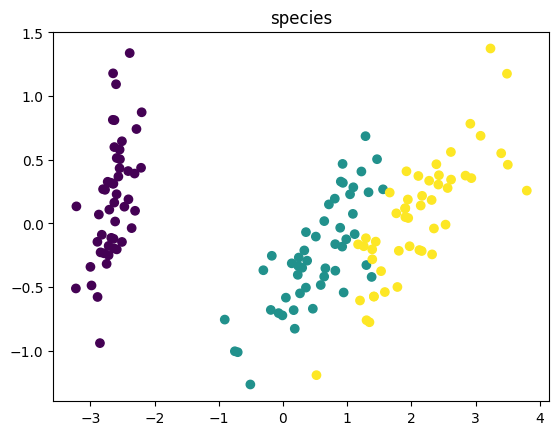

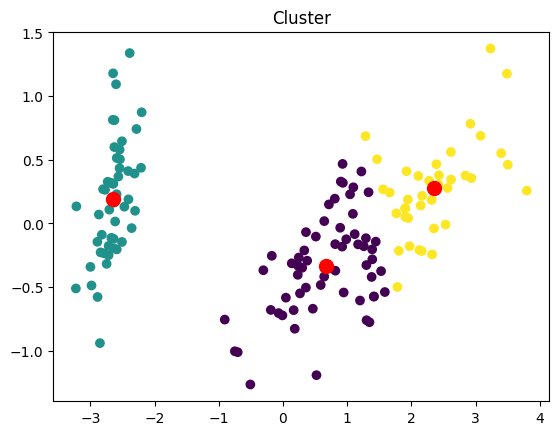

In [ ]:
# species (라벨 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c = iris_df['species'])
# 차원 축소한 주성분을 찍되, label데이터 값 기준으로 색깔 달리 찍음
plt.title('species')
plt.show()

# cluster (kmeans 군집 데이터) 기준 시각화
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', s=100)
# pca로 변환한 중심점 좌표 세 개 찍음
plt.title('Cluster')
plt.show()